In [1]:
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip \
  -O /home/shankar/Downloads/rps.zip
!wget --no-check-certificate \
  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip \
  -O /home/shankar/Downloads/rps-test-set.zip

--2021-02-24 21:47:07--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.196.80, 172.217.160.176, 172.217.27.208, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.196.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘/home/shankar/Downloads/rps.zip’

/home/shankar/Downl 100%[===================>] 191.38M  3.34MB/s    in 72s     

2021-02-24 21:48:20 (2.68 MB/s) - ‘/home/shankar/Downloads/rps.zip’ saved [200682221/200682221]

--2021-02-24 21:48:20--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 216.58.203.16, 172.217.174.240, 172.217.167.176, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|216.58.203.16|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (2

In [2]:
import zipfile
loc='/home/shankar/Downloads/rps.zip'
zip_ref=zipfile.ZipFile(loc,'r')
zip_ref.extractall(os.path.join(os.getcwd(),'datasets'))

In [5]:
import zipfile
loc='/home/shankar/Downloads/rps-test-set.zip'
zip_ref=zipfile.ZipFile(loc,'r')
zip_ref.extractall(os.path.join(os.getcwd(),'datasets'))

In [8]:
base_dir=os.path.join(os.getcwd(),'datasets')
train_dir=os.path.join(base_dir,'rps')
test_dir=os.path.join(base_dir,'rps-test-set')
train_rocks=os.path.join(train_dir,'rock')
train_paper=os.path.join(train_dir,'paper')
train_scissors=os.path.join(train_dir,'scissors')
test_rocks=os.path.join(test_dir,'rock')
test_paper=os.path.join(test_dir,'paper')
test_scissors=os.path.join(test_dir,'scissors')
print('total train data:',len(os.listdir(train_rocks))+len(os.listdir(train_paper))+len(os.listdir(train_scissors)))
print('total test data:',len(os.listdir(test_rocks))+len(os.listdir(test_paper))+len(os.listdir(test_scissors)))

total train data: 2520
total test data: 372


In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as pltimg
n_rows=3
n_cols=8
pic_index=0

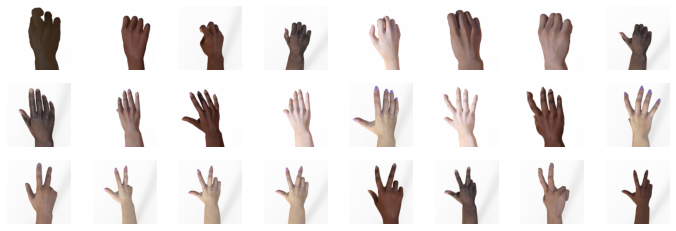

In [27]:
fig=plt.gcf()
fig.set_size_inches(n_rows*4,n_cols/2)
pic_index+=8
rock_images=[os.path.join(train_rocks,file_name) for file_name in os.listdir(train_rocks)[pic_index-8:pic_index]]
paper_images=[os.path.join(train_paper,file_name) for file_name in os.listdir(train_paper)[pic_index-8:pic_index]]
scissors_images=[os.path.join(train_scissors,file_name) for file_name in os.listdir(train_scissors)[pic_index-8:pic_index]]
for index,img in enumerate(rock_images+paper_images+scissors_images):
    sp=plt.subplot(n_rows,n_cols,index+1)
    sp.axis('Off')
    img=pltimg.imread(img)
    plt.imshow(img)
plt.show()

In [32]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data_gen=ImageDataGenerator(rescale=1./255,width_shift_range=0.2,rotation_range=40,height_shift_range=0.2,shear_range=0.2,zoom_range=0.2,horizontal_flip=True,fill_mode='nearest')
test_data_gen=ImageDataGenerator(rescale=1./255)
train_generator=train_data_gen.flow_from_directory(train_dir,target_size=(150,150),batch_size=126,class_mode='categorical')
test_generator=test_data_gen.flow_from_directory(test_dir,target_size=(150,150),batch_size=126,class_mode='categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [31]:
model=tf.keras.models.Sequential([
tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
tf.keras.layers.MaxPooling2D(2, 2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPooling2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dropout(0.5),#avoid overfitting
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(3, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer=RMSprop(lr=1e-4),metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [33]:
history=model.fit(train_generator,steps_per_epoch=20,epochs=25,validation_data=test_generator,validation_steps=3,verbose=2)

Epoch 1/25
20/20 - 232s - loss: 1.0833 - accuracy: 0.3988 - val_loss: 1.0363 - val_accuracy: 0.4113
Epoch 2/25
20/20 - 212s - loss: 1.0486 - accuracy: 0.4611 - val_loss: 0.9108 - val_accuracy: 0.6237
Epoch 3/25
20/20 - 193s - loss: 0.9438 - accuracy: 0.5647 - val_loss: 0.7401 - val_accuracy: 0.8602
Epoch 4/25
20/20 - 173s - loss: 0.8850 - accuracy: 0.5798 - val_loss: 0.6879 - val_accuracy: 0.7715
Epoch 5/25
20/20 - 166s - loss: 0.8116 - accuracy: 0.6298 - val_loss: 0.5868 - val_accuracy: 0.7769
Epoch 6/25
20/20 - 190s - loss: 0.7574 - accuracy: 0.6651 - val_loss: 0.4945 - val_accuracy: 0.8333
Epoch 7/25
20/20 - 190s - loss: 0.6993 - accuracy: 0.7056 - val_loss: 0.3833 - val_accuracy: 0.9462
Epoch 8/25
20/20 - 171s - loss: 0.6432 - accuracy: 0.7321 - val_loss: 0.3435 - val_accuracy: 0.9651
Epoch 9/25
20/20 - 137s - loss: 0.5966 - accuracy: 0.7520 - val_loss: 0.3933 - val_accuracy: 0.9140
Epoch 10/25
20/20 - 114s - loss: 0.5730 - accuracy: 0.7643 - val_loss: 0.4024 - val_accuracy: 0.8226

Text(0.5, 1.0, 'training and validation losses')

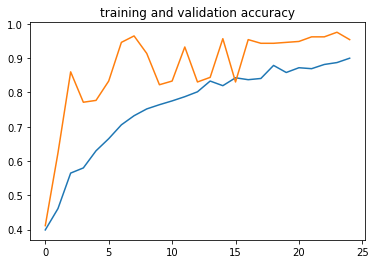

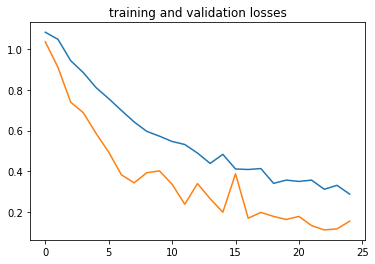

In [34]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(25)
plt.plot(epochs,acc)
plt.plot(epochs,val_acc)
plt.title('training and validation accuracy')
plt.figure()
plt.plot(epochs,loss)
plt.plot(epochs,val_loss)
plt.title('training and validation losses')

In [39]:
from keras.preprocessing import image
image_read=image.load_img(os.path.join(test_scissors,os.listdir(test_scissors)[50]),target_size=(150,150))
img=image.img_to_array(image_read)
img=img.reshape((1,)+img.shape)
img*=1./255
# 0 paper 1 rock 2 scissors
model.predict_classes(img)

array([2])